# 🔁 Bootstrap Analysis

This notebook uses non-parametric bootstrap resampling to estimate the uncertainty of the uplift in conversion rates between the ad group and PSA group.

## Goals:
- Generate bootstrap distribution of conversion rate differences
- Estimate 95% confidence interval
- Visualize uncertainty

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load data
df = pd.read_csv('marketing_AB.csv')
df['converted'] = df['converted'].astype(int)

Bootstrap estimate of difference in conversion rates (ad - psa): 0.0077
95% CI: [0.0060, 0.0093]


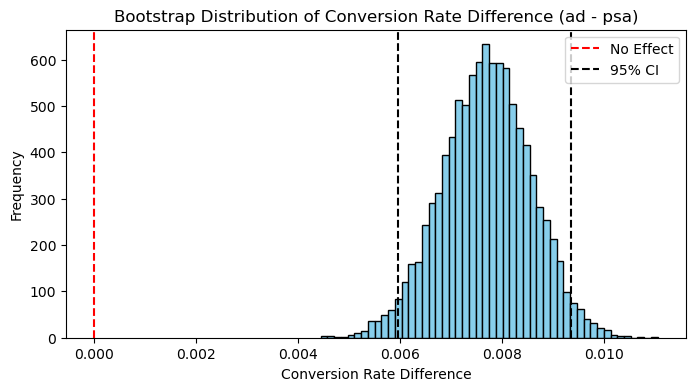

In [3]:

# Step 1: Extract data
ad_group = df[df["test group"] == "ad"]["converted"]
psa_group = df[df["test group"] == "psa"]["converted"]

# Step 2: Bootstrap sampling
def bootstrap_diff(group1, group2, n_bootstrap=10000):
    np.random.seed(0)
    diff_distribution = []
    for _ in range(n_bootstrap):
        sample1 = np.random.choice(group1, size=len(group1), replace=True)
        sample2 = np.random.choice(group2, size=len(group2), replace=True)
        diff = np.mean(sample1) - np.mean(sample2)
        diff_distribution.append(diff)
    return np.array(diff_distribution)

# Step 3: Run Bootstrap
boot_diffs = bootstrap_diff(ad_group.values, psa_group.values)

# Step 4: Compute 95% CI
lower, upper = np.percentile(boot_diffs, [2.5, 97.5])
mean_diff = np.mean(boot_diffs)

print(f"Bootstrap estimate of difference in conversion rates (ad - psa): {mean_diff:.4f}")
print(f"95% CI: [{lower:.4f}, {upper:.4f}]")

# Step 5: Visualization
plt.figure(figsize=(8, 4))
plt.hist(boot_diffs, bins=50, color='skyblue', edgecolor='black')
plt.axvline(x=0, color='red', linestyle='--', label='No Effect')
plt.axvline(x=lower, color='black', linestyle='--', label='95% CI')
plt.axvline(x=upper, color='black', linestyle='--')
plt.title("Bootstrap Distribution of Conversion Rate Difference (ad - psa)")
plt.xlabel("Conversion Rate Difference")
plt.ylabel("Frequency")
plt.legend()
plt.show()

## Bootstrap Estimation of Conversion Rate Difference

To estimate the uncertainty around the uplift in conversion rate between the ad and PSA groups, we performed a non-parametric bootstrap with 10,000 resamples.

### Results:

- **Estimated uplift (ad − psa)**: 0.0077  
- **95% Confidence Interval**: [0.0060, 0.0093]  
- The entire confidence interval lies above zero, providing strong statistical evidence that the ad campaign increases the likelihood of user conversion.

### Interpretation:

The histogram shows the distribution of uplift values across bootstrap resamples. The red dashed line at 0 represents the null hypothesis (no effect), which is clearly excluded by the black confidence interval lines.

This analysis confirms that the observed difference in conversion rates is unlikely to be due to random chance, even without relying on distributional assumptions, and reinforces the results from both the z-test and logistic regression.

## Why Use Bootstrap?

While classical hypothesis tests (e.g., z-test) provide p-values and confidence intervals under strong assumptions (e.g., normal approximation, large-sample asymptotics), they may be sensitive to group imbalance, non-normality, or subtle violations of independence.

Bootstrap is a **non-parametric resampling technique** that allows us to:
- Estimate the distribution of a statistic (e.g., conversion rate difference) directly from the data
- Construct confidence intervals without relying on closed-form formulas or asymptotic normality
- Provide an intuitive visual representation of uncertainty

In this context, the bootstrap procedure gives us a robust, model-free estimate of the uplift distribution, serving as a validation tool that complements the results of z-test and logistic regression. Because our sample size is large, the bootstrap distribution is tight and stable, and its 95% confidence interval provides strong support for the campaign's effectiveness.